# Introduction to Data Visualization.

> **Note:** This book is available in two ways:
> 1. Downloading the repository and following the instructions in the file [README.md](https://github.com/ramirezlab/CHEMO/blob/main/README.md)
> 2. Clicking here on [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ramirezlab/CHEMO/blob/main/2_PART_TWO/2.2_DataVisualization.en.ipynb)

A few years ago the challenge was how to get millions of pieces of data, but today this is no longer a problem, you just have to visit the [ChEMBL](https://www.ebi.ac.uk/chembl/ ) where we can find an interesting number of bioactive molecules with certain characteristics to be converted into medicines.

Although the field of data goes beyond its manipulation, also as scientists it is valuable to develop skills related to the presentation of our findings. And if we wanted to go a little further, something important to take into account apart from a good visualization is having a story to tell.

In previous Notebooks we learned to manipulate some data sets and for this we saw from the basics of Python to the most advanced such as [DataFrame](../2_PART_TWO/2.1_Dataframes.ipynb), now it's time to learn how to create graphs *(Visualizations)* of our data using two of the most famous libraries in the world `Matplotlib` and `Seaborn`. For most cases, the first of these would be more than enough, but to make slightly more complex graphs we are going to use the second. With these two we will try to create the most popular visualizations.

### Introduction to Matplotlib

According to the website **[Matplotlib](https://matplotlib.org/stable/index.html) is a library for creating static, animated and interactive visualizations in Python**<sup> **1** </sup>. Simple, do you remember the concept of Library? If not [here](https://www.geeksforgeeks.org/libraries-in-python/) you can read a bit more about it. There is not much to add, beyond the fact that the library is already installed as part of the dependencies of the virtual environment of the course.

> In case the library is not installed, you can use the command `pip install matplotlib`, or `conda install matplotlib`.

Before starting to graph it is good to develop a basic understanding of how this library works, since in many scenarios we will see that certain configurations are necessary.

#### The Pyplot module

In general, the `pyplot` module is the focus of interest when we want to plot with `Matplotlib`, despite the fact that the library has a great variety of functionalities associated with other features such as configuration of styles and animations. In general, we will always import the module as follows:

```
    import matplotlib.pyplot as plt
```

To create a graph or **plot** we must follow a series of steps or calls certain functions *(methods)* that belong to the `pyplot` module. Let's look at an example within a specific context below.

# EEG database
We are going to work with the [EEG database dataset](https://archive.ics.uci.edu/ml/datasets/eeg+database). These data arise from a large study to examine Electroencephalogram (EEG) correlations of genetic predisposition to alcoholism. It contains measurements from 64 electrodes placed on the scalp sampled at 256 Hz (256 data per second) for one second.

Let's download and import data from two test subjects: the [Individual 364's EGG] dataset (https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000364 .tar.gz) and the [EEG of individual 365](https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000365.tar.gz).

Once downloaded, we save them in the folder [../data/co2a0000364](2_PART_TWO/data/co2a0000364) and [../data/co2a0000365](2_PART_TWO/data/co2a0000365) and convert them into a `Dataframe`.

In [1]:
import requests
import tarfile
import gzip
import pandas as pd

# Download the data file via the requests library.
with requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000364.tar.gz", stream=True) as rx, tarfile.open( fileobj=rx.raw, mode="r:gz") as tarobj:
    tarobj.extractall('./data/')
with requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000365.tar.gz", stream=True) as rx, tarfile.open( fileobj=rx.raw, mode="r:gz") as tarobj:
    tarobj.extractall('./data/')

# Once the data is downloaded, it is converted into a Dataframe
with gzip.open('data/co2a0000364/co2a0000364.rd.000.gz', "rb") as f:
    df364 = pd.read_csv(f, delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])
with gzip.open('data/co2a0000365/co2a0000365.rd.003.gz', "rb") as f:
    df365 = pd.read_csv(f, delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])

Now let's inspect the data that we previously downloaded a bit, in the dataset we will find the `trial or test number`, `the position of the sensor` and `the value read by the sensor`, this for both individual 364 and individual 365 :

In [2]:
df364.head()

,trial_number,sensor_position,sample_number,sensor_value
0,0,FP1,0,-8.921
1,0,FP1,1,-8.433
2,0,FP1,2,-2.574
3,0,FP1,3,5.239
4,0,FP1,4,11.587


We can check the number of sensors of each base and the amount of data per sensor (There are 256 data + the start marker of the readings).

In [3]:
df364.sensor_position.value_counts()

sensor_position
AF7    257
FP2    257
F5     257
F6     257
FT7    257
      ... 
P7     257
PO2    257
PO1    257
O2     257
FP1    256
Name: count, Length: 64, dtype: int64

## Plotting with Matplotlib

Ok, now that the data is loaded and ready, we can explore it visually through our first few visualizations, but first we need to make a little adjustment to the `Dataframe`. According to the BD, the *EEG* device is a device that measures the electrical activity of the brain<sup> **2** </sup>. We are interested in representing the data with graphs that give us information about individuals.

The data is obtained by placing 64 sensors on the head *(on the scalp)* in specific positions and receiving brain activity for one second (the measure of the brain's electrical fluctuation in volts). Since 256 impulses are received in a second, we can add a new column: `time` that allows us to measure the respective instant in which the signal was received.

In [4]:
import numpy as np

# The values of the data frame that are not associated with any trial (Test) are eliminated.
dfA = df364[df364['trial_number'] != '#'].copy()
dfB = df365[df365['trial_number'] != '#'].copy()

# the data is one second (256 data in one second, per sensor), create the time variable for each sensor
# see https://kdd.ics.uci.edu/databases/eeg/eeg.data.html
time = np.linspace(0,1,256)

# put time on each sensor (64 times)
all_time = np.array(list(time) * 64)
#create column with time in milliseconds
dfA['time'] = all_time
dfB['time'] = all_time
# Remove the 'trial_number' and 'sample_number' columns
dfA.drop(['trial_number', 'sample_number'], axis=1, inplace=True)
dfB.drop(['trial_number', 'sample_number'], axis=1, inplace=True)

Now if the datasets are ready! A quick note of clarification: from this point on, we will refer to the two individuals as individuals **A** and **B**. Before we continue, let's do a final review of the individual **A** dataset:

In [5]:
print(len(dfA))
dfA.head()

16384


,sensor_position,sensor_value,time
0,FP1,-8.921,0.000000
1,FP1,-8.433,0.003922
2,FP1,-2.574,0.007843
3,FP1,5.239,0.011765
4,FP1,11.587,0.015686


> *Observation*: The 16384 data are 256 data per sensor (And the EEG has 64 sensors)

### Our First Graph: LinePlot

We will start with the creation of the first graph and for this, it is necessary to call the `plot` method, as follows:
``` command
     plt.plot(x-axis, y-axis)
```

where `x-axis` and `y-axis` are the values for the respective axes of the Cartesian plane, and note that even at this point we do not have our visualization, because for this it is necessary to call the `show` method as we see it next:

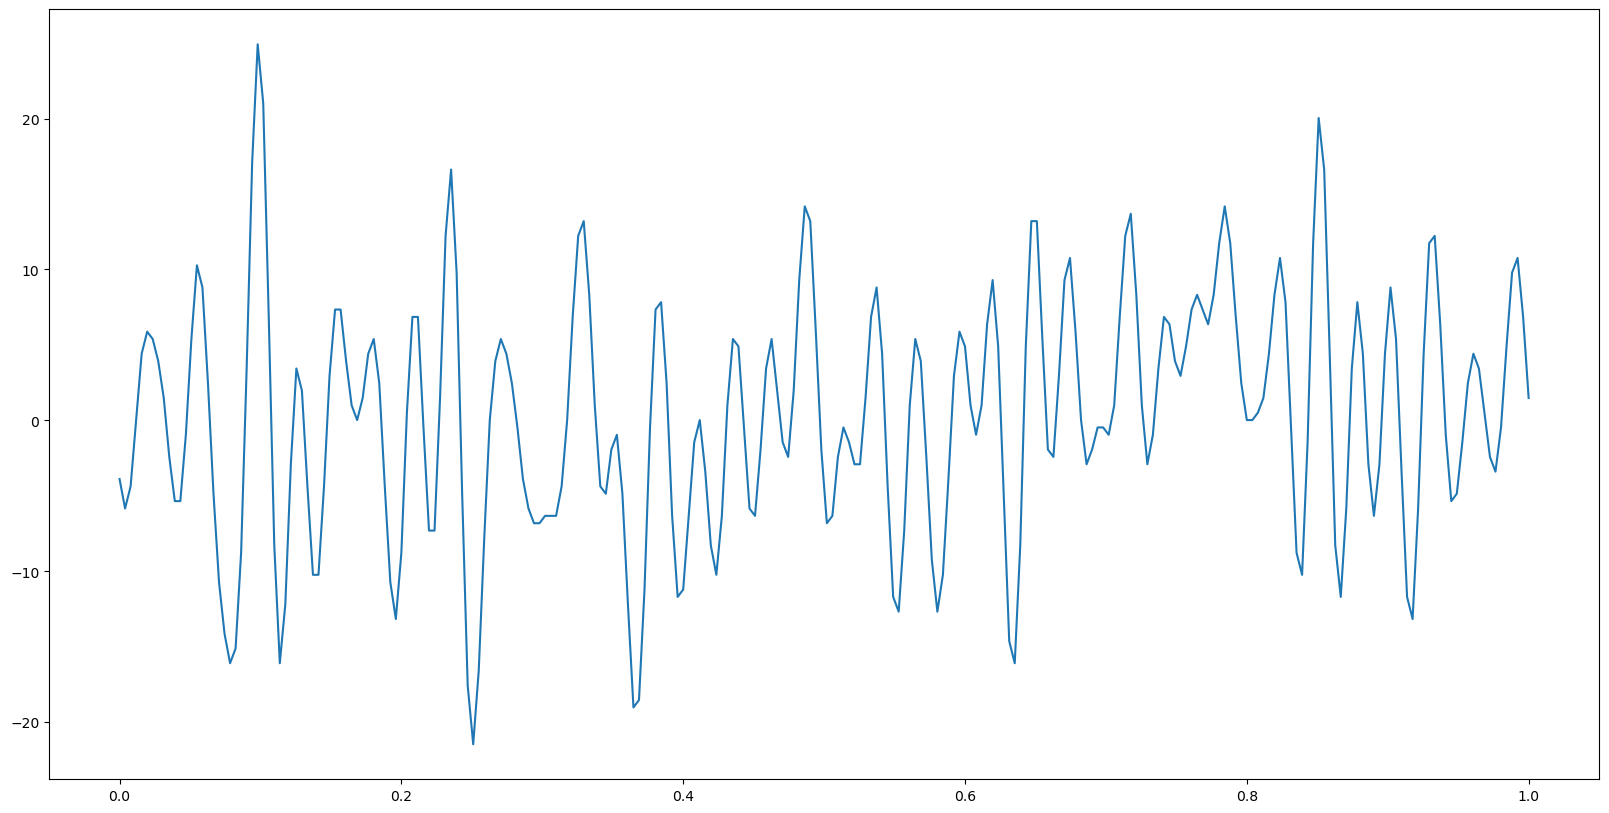

In [6]:
# Import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# The Dataframe is filtered with only the readings of a sensor: T8
df_sample = dfA[dfA["sensor_position"] == "T8"]

# Set the size of the plot
plt.subplots(figsize=(20, 10))

# The graph is created using the plot method
plt.plot(df_sample.time, df_sample.sensor_value)

# The graph is displayed
plt.show()

As a result we have a line graph or by its name in English a **Line Plot** *(Sometimes it is also called Line Chart)*. In it you can see the reading of the sensor **T8** of the EEG of the individual **A**, remember that this value is in microvolts.

To recap, to make a graph with `Matplotlib`, the following steps must be followed:

1. Import the `pyplot` module from the `Matplotlib` library
2. The graph must be initialized using the `plot` method.
3. Once the initialization and configuration of the **plot** is finished, the visualization must be invoked through the `show` method.

One of the most common uses of this type of visualization is to compare two variables. For example, if we wanted to see the graph of the variation of the sensor values in the position **P5** of the individual **A** and **B**, we would do the following:

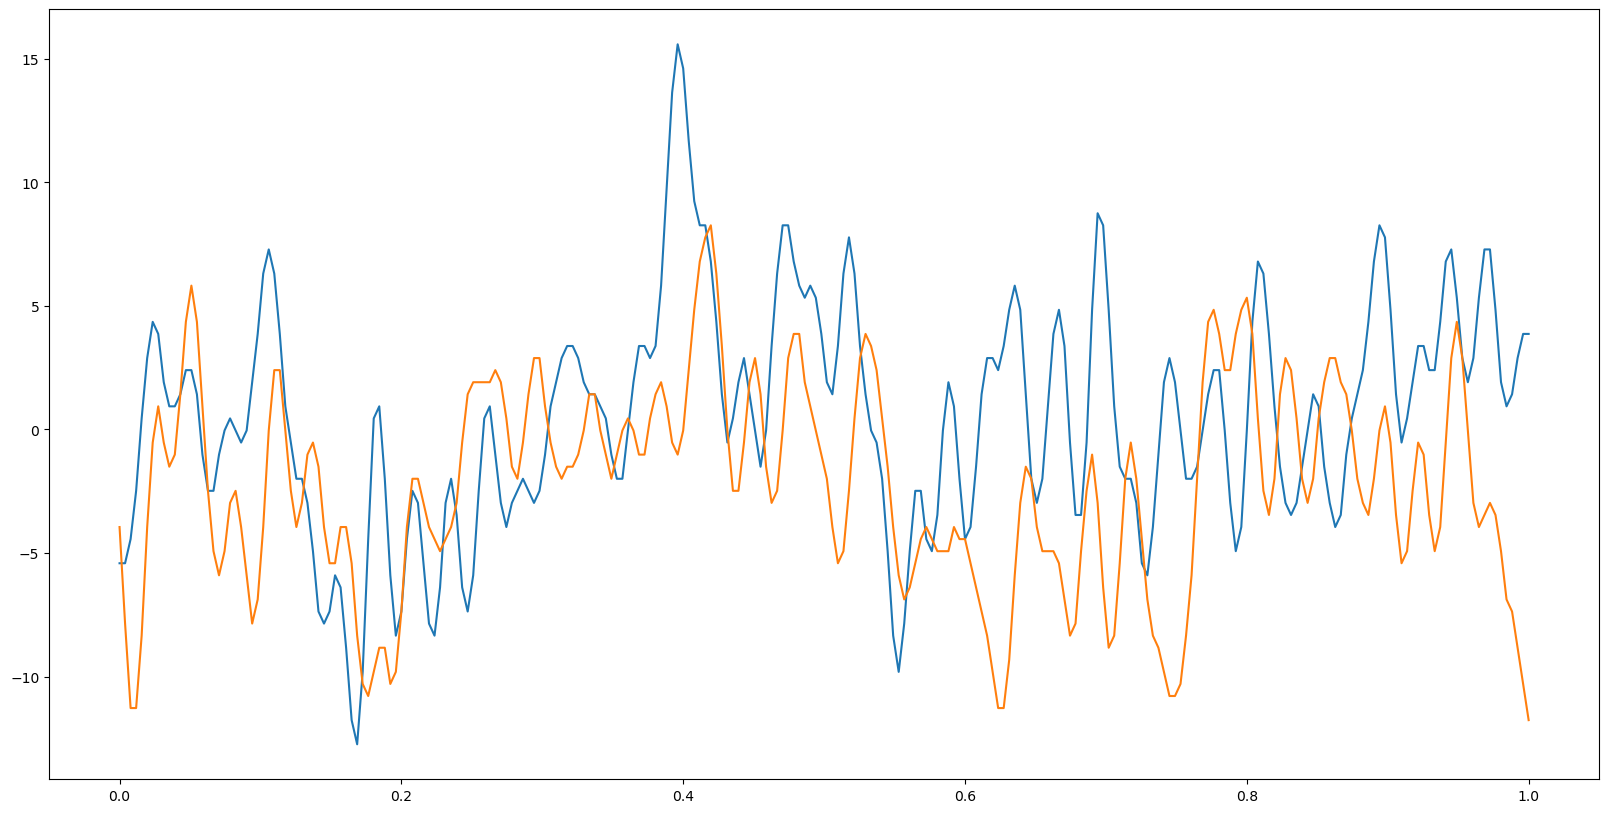

In [7]:
# Import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# A Dataframe is made from the readings of the sensors in position P5 of individual A and B
dfA_sample = dfA[dfA["sensor_position"] == "P5"]
dfB_sample = dfB[dfB["sensor_position"] == "P5"]

# Set the size of the plot
plt.subplots(figsize=(20, 10))

# The graph is created using the plot method
plt.plot(dfA_sample.time, dfA_sample.sensor_value)
plt.plot(dfB_sample.time, dfB_sample.sensor_value)


# The graph is displayed
plt.show()

You can see how the values follow a very similar trend but the graph at first glance does not tell us what it is. How about adding a bit of presentation to it, plus how about saving the figure for later use?

Let's see how easy it is to give a title and a name to your axes *(Attention to lines 16-26)*,
and the command to save an image is: `plt.savefig(filepath, options)` *(line 29)*.

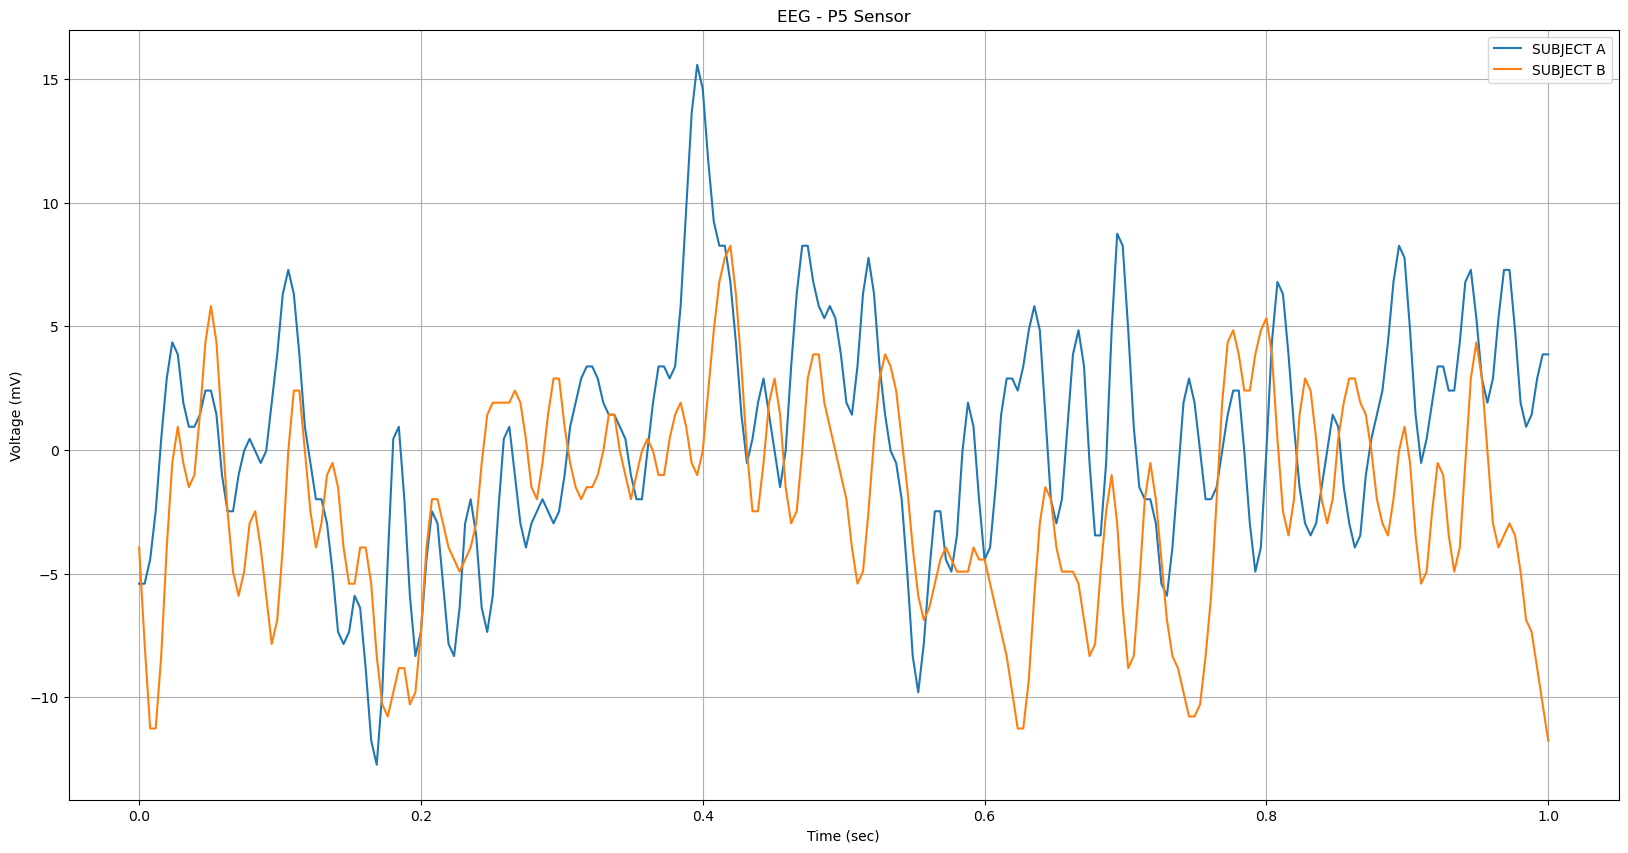

In [8]:
# Import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# A Dataframe is made from the readings of the sensors at position P5 of individual A and B
dfA_sample = dfA[dfA["sensor_position"] == "P5"]
dfB_sample = dfB[dfB["sensor_position"] == "P5"]

# Set the size of the plot
plt.subplots(figsize=(20, 10))

# Create the graph using the plot method
plt.plot(dfA_sample.time, dfA_sample.sensor_value)
plt.plot(dfB_sample.time, dfB_sample.sensor_value)

# Enable the grid
plt.grid(True)

# Name the axes
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (mV)')

# Give the graph a title
plt.title('EEG - P5 Sensor')

# The legends of the lines are configured
plt.legend(['SUBJECT A', 'SUBJECT B'])

# The image is saved in the data folder, name: image1.png (.png is the extension of the image)
plt.savefig(f'./data/image1.png', bbox_inches='tight')
# The graph is displayed
plt.show()

In the eyes of any reader, our graph now makes a little more sense.

So far we have seen how to create a one-line and multi-line plot and with it we have learned some of the basic configuration methods of the `Matplotlib` library, now it is the turn to configure `Colors`, `Styles` and `Markers `.

In particular we will talk about the third parameter of the `plot` method:

```
     plt.plot(x, y, '[color][marker][linestyle]')
```

In this case and returning to the previous graph we will change the color of the lines:

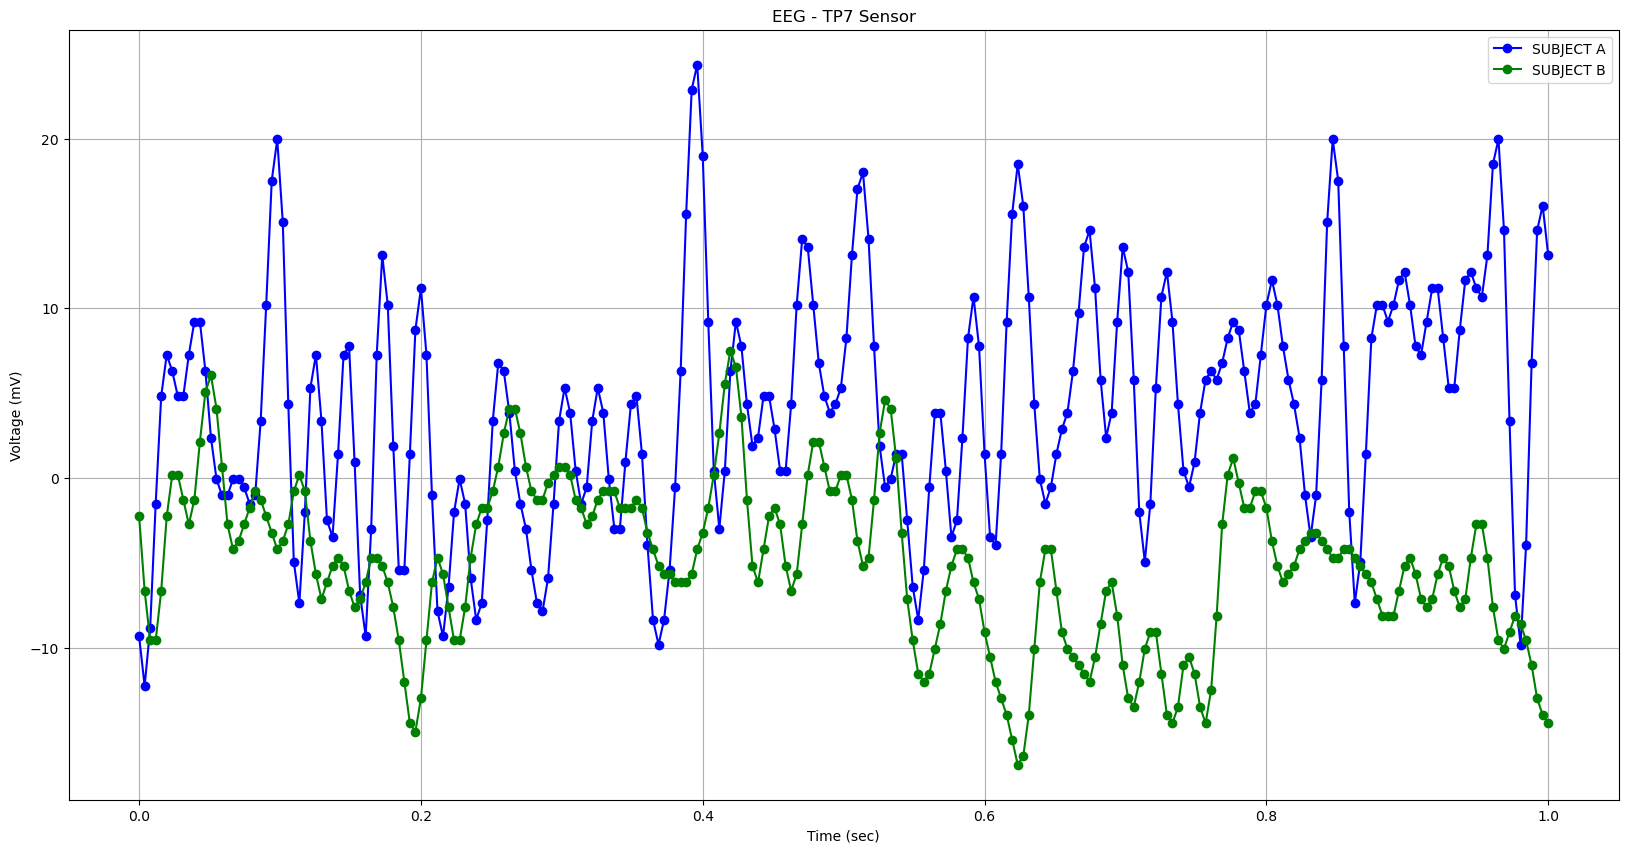

In [9]:
# Import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# A Dataframe is made from the readings of the sensors at position TP7 of individual A and B
dfA_sample = dfA[dfA["sensor_position"] == "TP7"]
dfB_sample = dfB[dfB["sensor_position"] == "TP7"]

# Set the size of the plot
plt.subplots(figsize=(20, 10))

# The graph is created using the plot method
plt.plot(dfA_sample.time, dfA_sample.sensor_value, 'ob-')
plt.plot(dfB_sample.time, dfB_sample.sensor_value, 'og-')

# Enable the grid
plt.grid(True)

# Name the axes
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (mV)')

# Give the graph a title
plt.title('EEG - TP7 Sensor')

# The legends of the graphed lines are configured
plt.legend(['SUBJECT A', 'SUBJECT B'])

# The graph is displayed
plt.show()

Even though our output is the same, the lines now have a different style. The only change here was the third argument to the `plot` *(Lines 12 and 13)* method, where you can set the options for plot displays and styles.

*To know how to give colors, styles and markers to your graphs, the best thing to do is [click here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).*

## Matplotlib directly from a Dataset

As we've seen so far, there's a lot of work involved in building a visualization plot directly with the `Matplotlib` library, but what if there's an easier way to do it? Well, it would be through the `DataFrames` library, only one or a couple of lines of code are needed to configure a graph.

Let's look at the example below:

<Axes: xlabel='time'>

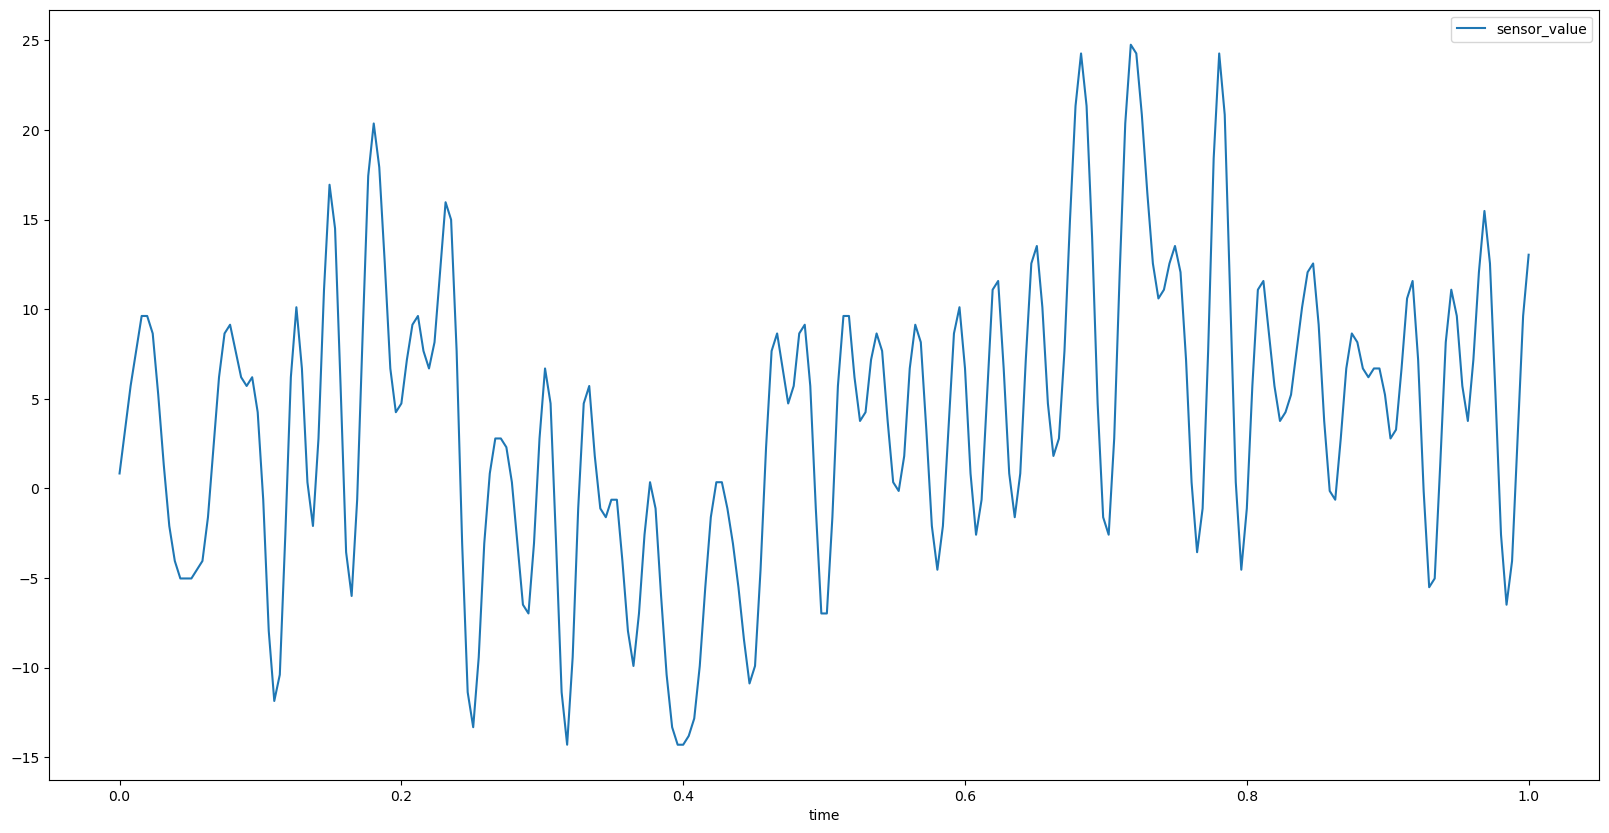

In [10]:
dfA[dfA["sensor_position"] == "FP2"].plot(x="time", y="sensor_value", figsize=(20,10))

## 3D graphics
The data we are studying can be presented in a single graph in such a way that all sensors *(channels)* of a particular individual can be visualized. Let's see how to achieve it by means of a three-dimensional graph where the $x-axis$ represents the time (1 second), the $y-axis$ the channels (64) and the $z-axis$ the measured voltage of each channel. during the time.

For this purpose we will use `The mplot3d Toolkit`, in [this link](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) you can see some examples of how to use it.

Since the sensors have categorical names, we must change them to ordinal, for that we create a dictionary that assigns each sensor a number between 0 and 63 (channels).

In [11]:
sensor_list = dict()
for ind, sensor in enumerate(dfA.sensor_position.unique()):
    sensor_list[sensor] =  ind
sensor_list

{'FP1': 0,
 'FP2': 1,
 'F7': 2,
 'F8': 3,
 'AF1': 4,
 'AF2': 5,
 'FZ': 6,
 'F4': 7,
 'F3': 8,
 'FC6': 9,
 'FC5': 10,
 'FC2': 11,
 'FC1': 12,
 'T8': 13,
 'T7': 14,
 'CZ': 15,
 'C3': 16,
 'C4': 17,
 'CP5': 18,
 'CP6': 19,
 'CP1': 20,
 'CP2': 21,
 'P3': 22,
 'P4': 23,
 'PZ': 24,
 'P8': 25,
 'P7': 26,
 'PO2': 27,
 'PO1': 28,
 'O2': 29,
 'O1': 30,
 'X': 31,
 'AF7': 32,
 'AF8': 33,
 'F5': 34,
 'F6': 35,
 'FT7': 36,
 'FT8': 37,
 'FPZ': 38,
 'FC4': 39,
 'FC3': 40,
 'C6': 41,
 'C5': 42,
 'F2': 43,
 'F1': 44,
 'TP8': 45,
 'TP7': 46,
 'AFZ': 47,
 'CP3': 48,
 'CP4': 49,
 'P5': 50,
 'P6': 51,
 'C1': 52,
 'C2': 53,
 'PO7': 54,
 'PO8': 55,
 'FCZ': 56,
 'POZ': 57,
 'OZ': 58,
 'P2': 59,
 'P1': 60,
 'CPZ': 61,
 'nd': 62,
 'Y': 63}

Now we create the `channel` column to assign the number to each sensor using the dictionary.
Finally we organize the columns to represent the data of each axis (`time`: $x-axis$, `channel`: $y-axis$, `sensor_value`: $z-axis$)

In [12]:
dfA['channel'] = dfA.sensor_position.apply(lambda x: sensor_list[x])
dfA = dfA[['time', 'sensor_position', 'channel', 'sensor_value']]
dfA.head()

,time,sensor_position,channel,sensor_value
0,0.000000,FP1,0,-8.921
1,0.003922,FP1,0,-8.433
2,0.007843,FP1,0,-2.574
3,0.011765,FP1,0,5.239
4,0.015686,FP1,0,11.587


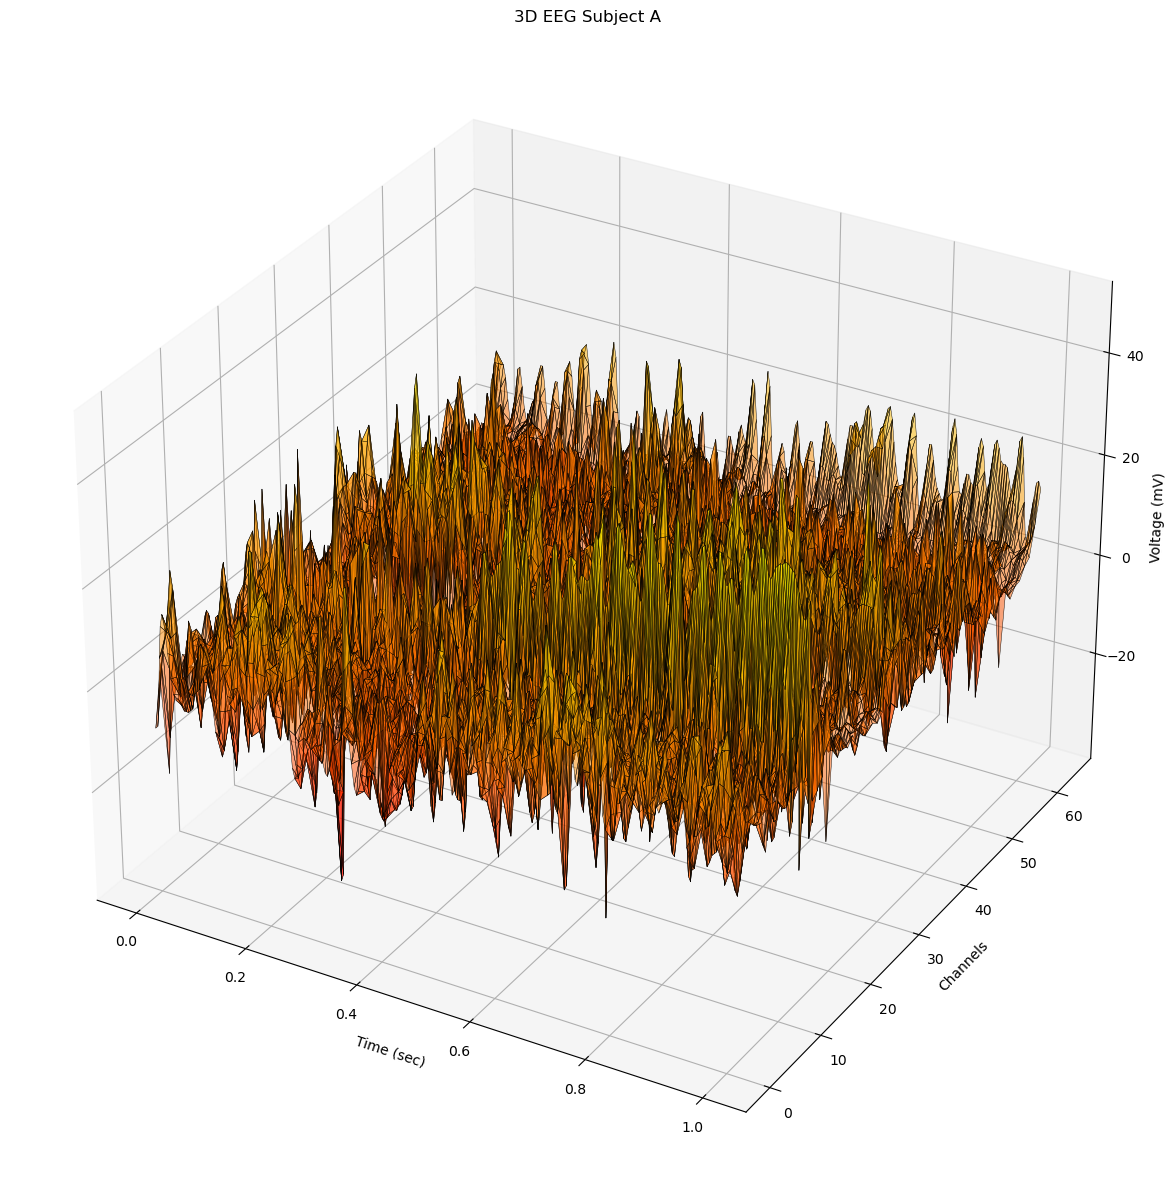

In [13]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The values for the different axes of the graph are generated
x = dfA.time
y = dfA.channel
z = dfA.sensor_value

# Create the color map
my_cmap = plt.get_cmap('hot')

# The graph is generated
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection ='3d')
ax.plot_trisurf(x, y, z,
                 edgecolor = 'black', alpha=0.5, cmap=plt.get_cmap('autumn'), shade=False,
                 linewidth = 0.3, antialiased = True)

# Configure the graph styles
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Channels')
ax.set_zlabel('Voltage (mV)')
ax.set_title('3D EEG Subject A')

# The graph is displayed
plt.show()

Another way to represent the signals is through three-dimensional visualizations, in such a way that they form a surface, they are known as *surface plot* or surface graph and can be in 2 and 3 dimensions.

> A graph of a 3D Surface allows the visual representation of a dataset in 3 dimensions, and describes the functional relationship between two independent variables, in our case `time` and `sensor` and a dependent variable that would be in our case `the value` of the sensor`.

We start by separating the values and creating a Dataframe for each channel:

In [14]:
# Separation of the data frames, a data frame is created for each channel
df_channel = list()
for channel in dfA.channel.unique():
     df_channel.append(dfA[dfA['channel'] == channel])
df_channel[0].head() # Dataframe of the first sensor

,time,sensor_position,channel,sensor_value
0,0.000000,FP1,0,-8.921
1,0.003922,FP1,0,-8.433
2,0.007843,FP1,0,-2.574
3,0.011765,FP1,0,5.239
4,0.015686,FP1,0,11.587


Now we create a **surface**, but we modify it a bit so that it only shows the curves of the signals.

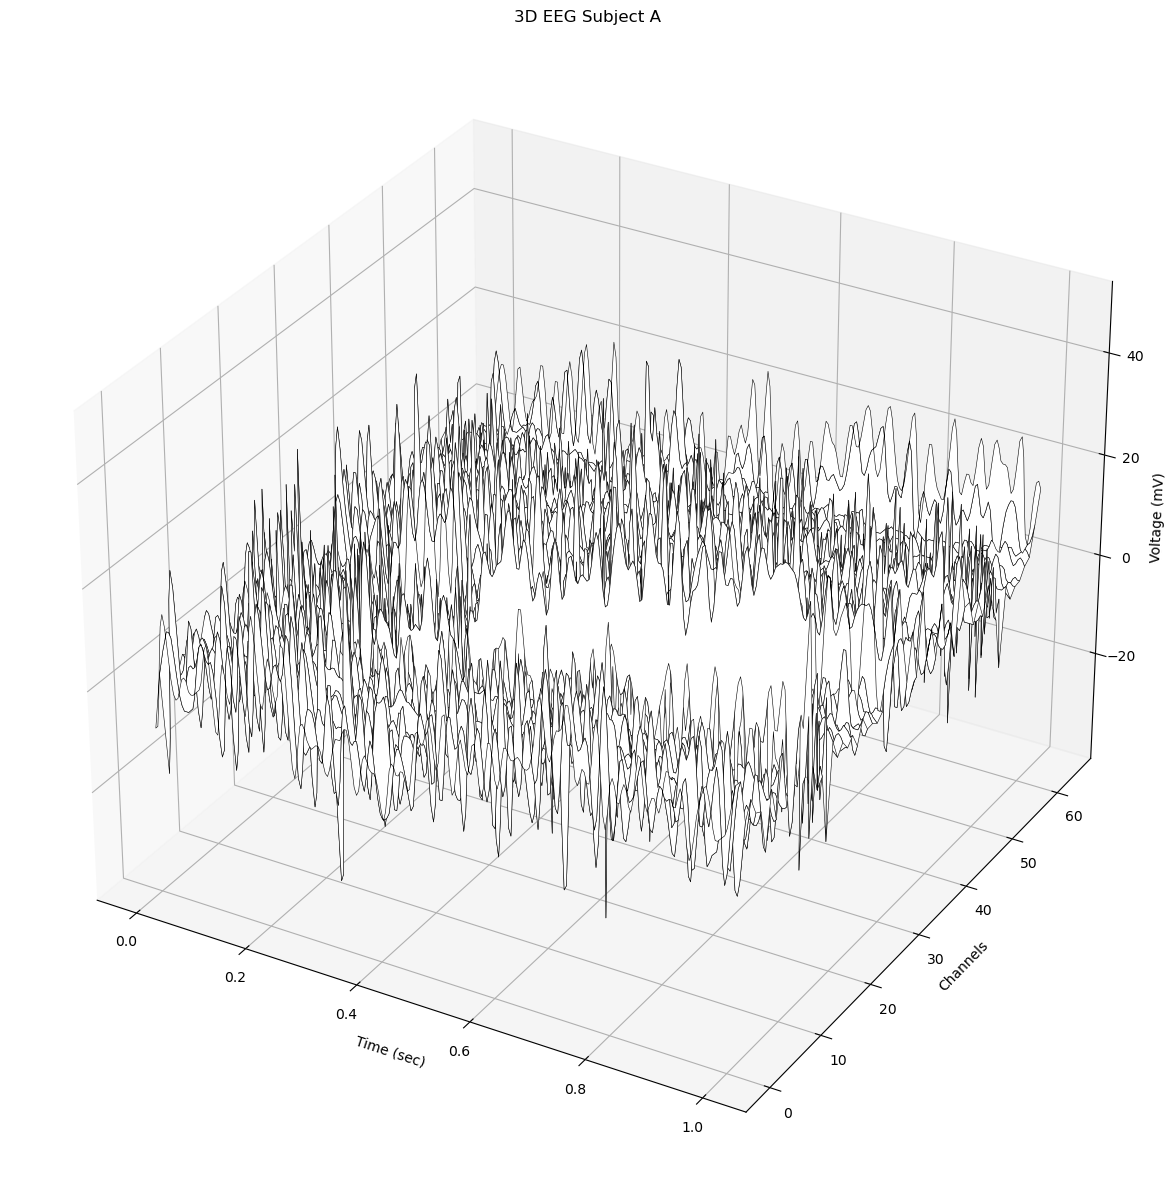

In [15]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The values for the different axes of the graph are generated
x = dfA.time.unique()
y = dfA.channel.unique()
X,Y = np.meshgrid(x,y)
Z = np.zeros((len(y),len(x)))
for i in dfA.channel.unique():
     Z[i] = df_channel[i].sensor_value

# Create the colormap
my_cmap = plt.get_cmap('hot')

# The graph is generated
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, Z, edgecolor = 'black', rstride=1, cstride=256, color='w', shade=False, lw=.4)

# Configure the details of the graph
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Channels')
ax.set_zlabel('Voltage (mV)')
ax.set_title('3D EEG Subject A')

# The graph is displayed
plt.show()

### Graphing with Pandas

From the `Pandas` library we can directly invoke the creation of a graph, as we saw in the previous example. The interesting thing is that the most common methods of the library, such as `Series` and `DataFrame` have their own `plot` function, which is nothing more than a wrapper of the `plot` method of `Matplotlib`.

#### Bar graphic

Another of the best-known visualizations is the **Bar Chart**. In general, these are the types of visualizations with which we perhaps most interact and are familiar, although we are not so literate in the universe of statistics, this is a graph that is understandable at first glance.

Let's now try to visualize and summarize the information from our dataset [adult](./data/adult.data):

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/ramirezlab/CHEMO/main/2_PART_TWO/data/adult.data"

df_adults = pd.read_csv(url,
    names=['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'income'],
    header=None,
    skipinitialspace=True
)

df_adults.head()


,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Let's start by plotting the marital status of the adults in the dataset:

<Axes: xlabel='maritalstatus'>

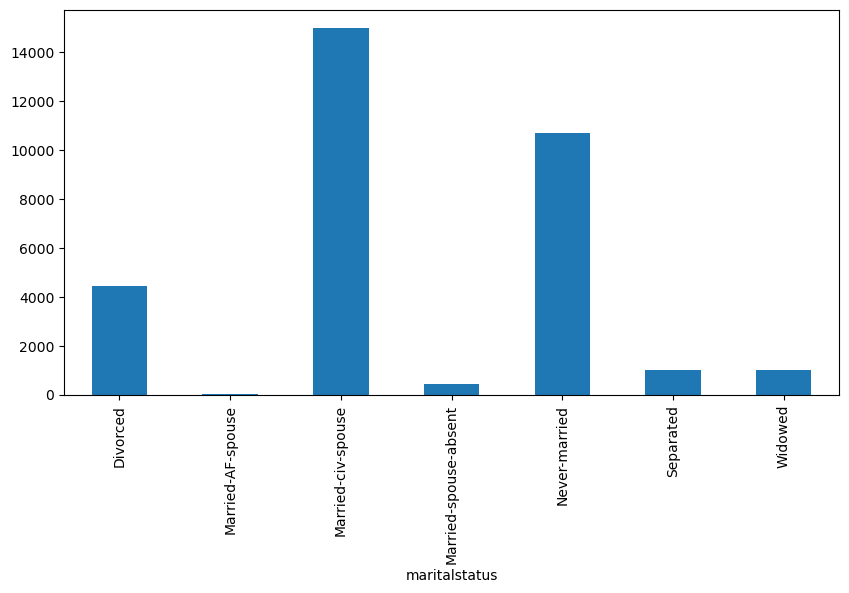

In [17]:
df_adults.groupby(["maritalstatus"]).agg("size").plot.bar(legend=False, figsize=(10, 5))

Now let's add two `plots`, to find out who under the marital status category earn between **>= 50** and **<= 50**, that is, how the income is distributed by category:

<Axes: xlabel='maritalstatus'>

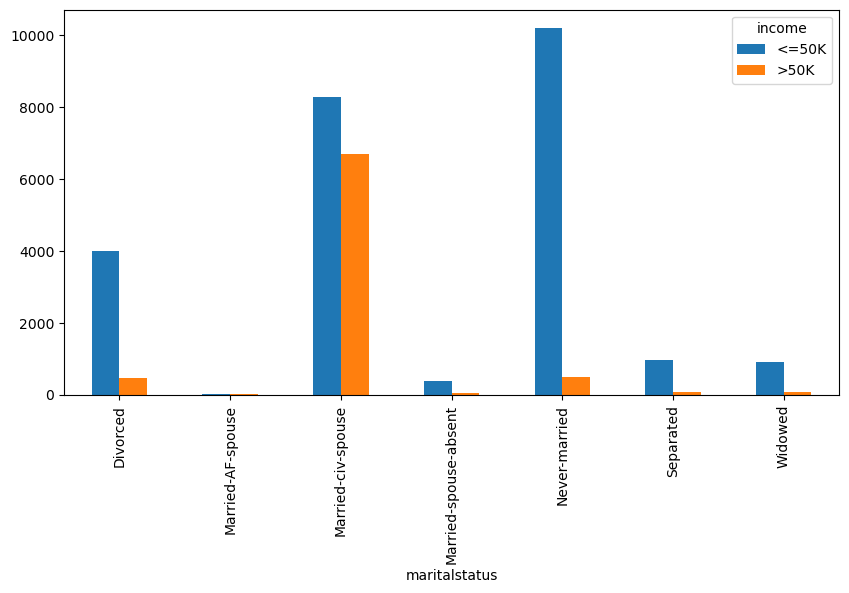

In [18]:
df_adults.groupby(['maritalstatus', 'income']).agg('size').unstack().plot.bar(figsize=(10, 5))

Now you can see that some have better income than others. Another of its most common applications is the so-called **histogram**, let's see an example taking up the `Dataframe of the EEG of subject A`:

<Axes: ylabel='Frequency'>

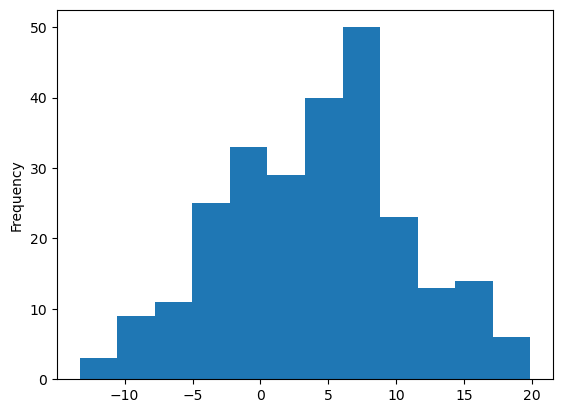

In [19]:
dfA[dfA["sensor_position"] == "FP1"]["sensor_value"].plot.hist(bins=12)

And what distribution do the data follow? A normal or binomial distribution? In general, a histogram can give us a clue about the probability distribution that follows a data set.

## Pie Chart

Let's go back to the `Adults` dataset and we are going to see what are the occupations that adults have and here the use of the famous pie chart or by its name in spanish **Gráfico de torta** is ideal:

array([<Axes: ylabel='<=50K'>, <Axes: ylabel='>50K'>], dtype=object)

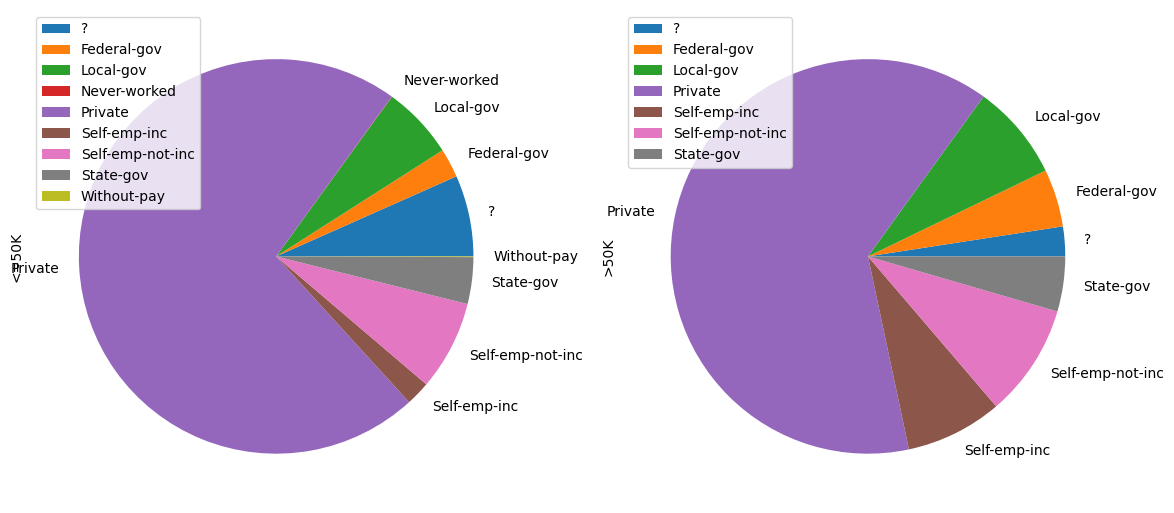

In [20]:
df_adults.groupby(["workclass", "income"]).agg("size").unstack().plot.pie(subplots=True, figsize=(14, 14), legend=True)

It seems that people who work in the private sector are the ones with the highest income.

# Graphing with Seaborn

Well let's enter the world of `Seaborn`. In general, and to graph the relationship of two variables, the acclaimed and revered `Scatter Plot` is used, for this we are going to work now with the dataset of [iris](./data/iris.data), let's start by importing its data:

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Import the data from the dataset and convert it to a DataFrame.
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["length_sepal", "width_sepal", "length_petal", " width_petal", "class_1"])
df_iris.head()

,length_sepal,width_sepal,length_petal,width_petal,class_1
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


`Seaborn` is one of the most used libraries today, because with little you can achieve a lot. It generally abstracts the complexity of the `MatPlotLib` library to a large extent and thereby makes graphing a pleasant experience.

Let's start by making a visualization where we can see the relationship between the `largo_sepalo` and `width_sepalo`, for this we will use the `replot` method:

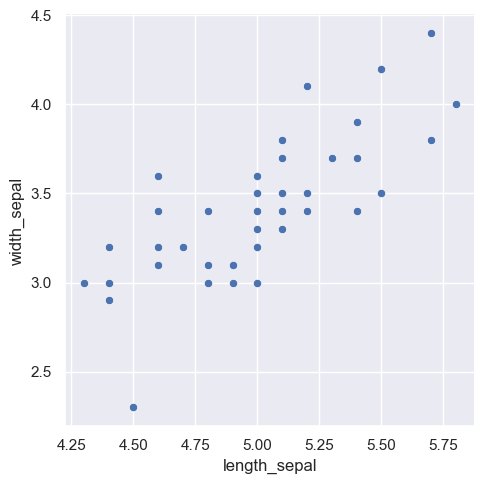

In [22]:
sns.relplot(data=df_iris.query('class_1 == "Iris-setosa"'), x="length_sepal", y="width_sepal")

This, to a certain extent, shows the relationship that exists between the length of the petal and the width, and it clearly follows that *the greater the length of the sepal, the greater its width*. And we would have to do the same for each class of iris.

Is it possible to visualize the entire dataset at once in the same graph? Since we have 3 classes of iris and it would be a lot of work to have to create these visualizations one by one.

For this we will use the parameter **hue** and **style**:

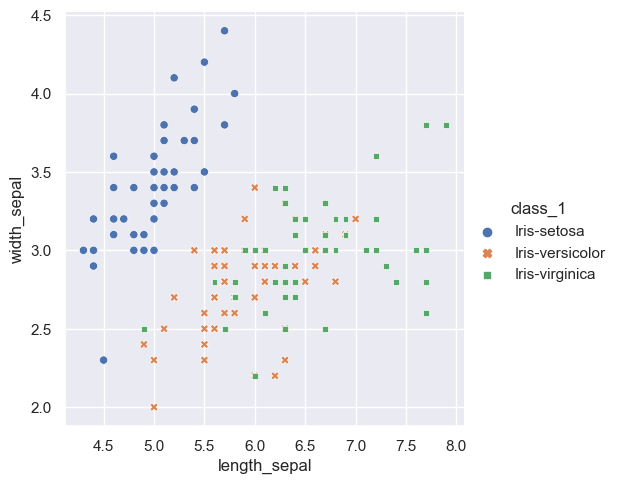

In [23]:
sns.relplot(data=df_iris, x="length_sepal", y="width_sepal", hue="class_1", style="class_1")

Perhaps a single graph is complex to read. Is it possible to separate them by class? Of course, let's make use of the **col** parameter:

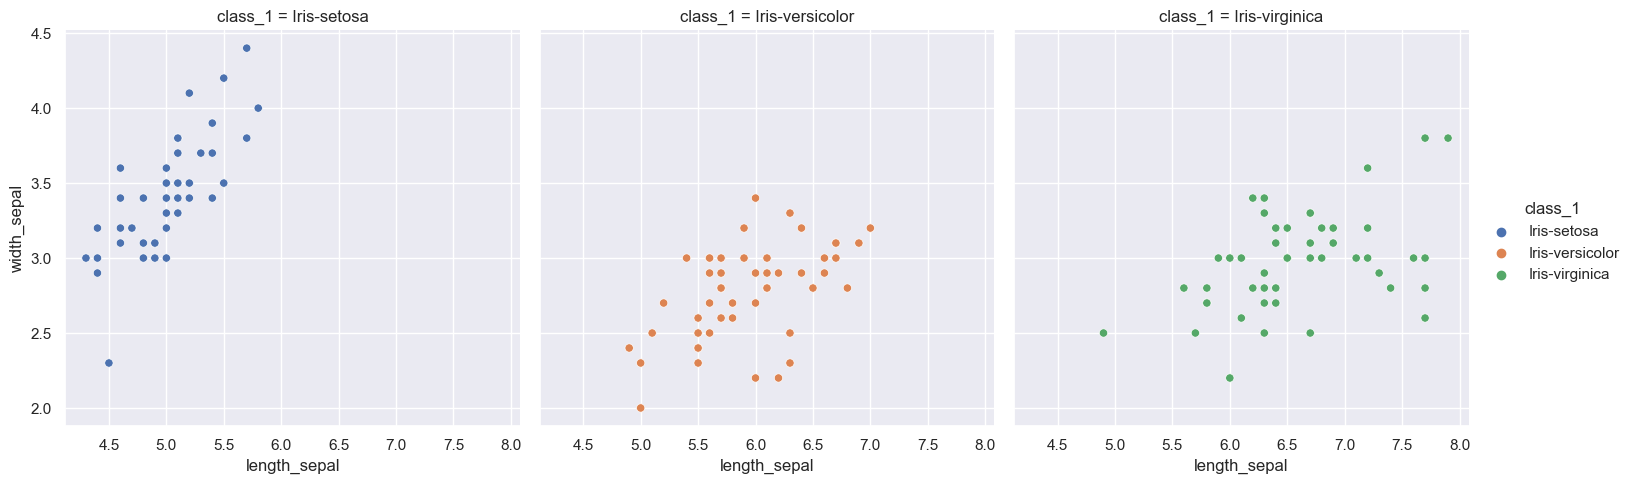

In [24]:
sns.relplot(data=df_iris, x="length_sepal", y="width_sepal",  hue="class_1", col="class_1")

Does it improve your visualization? Of course it does, and that is where `Seaborn` shows us that it is a great tool in the world of visualizations.

# Radar Plots

Finally, let's try to compare the iris classes in their four variables by means of a graph commonly known as **Radar Plot**.

> This type of visualization is very helpful to have data of multiple variables in 2D, the variables are in the axes (which by name follow the shape of a radar). The axes are positive relative to the center and follow a uniform arrangement.

In this type of graphics, the data is usually *scaled* (normalized), in such a way that they are all on the same "scale" (for example, they are all transformed to a scale from 0 to 1), and to know a little more about it [click here](https://ml-concepts.com/2021/10/08/min-max-normalization/).

In [25]:
# A copy of the dataset is created for each iris class (without the class column)
df_setosa = df_iris[df_iris['class_1'] == 'Iris-setosa'].drop("class_1", axis=1)
df_versicolor = df_iris[df_iris['class_1'] == 'Iris-versicolor'].drop("class_1", axis=1)
df_virginica = df_iris[df_iris['class_1'] == 'Iris-virginica'].drop("class_1", axis=1)

# Scale by MinMax.
df_setosa = (df_setosa - df_setosa.min()) / (df_setosa.max() - df_setosa.min())
df_versicolor = (df_versicolor - df_versicolor.min()) / (df_versicolor.max() - df_versicolor.min())
df_virginica = (df_virginica - df_virginica.min()) / (df_virginica.max() - df_virginica.min())

With the normalized data we can find the average of each variable *(width_sepal, long_sepal, ...)* of each type of iris (For this we use the `mean` method):

In [26]:
# The DataFrame is created with the normalized data
df_iris_normalized = pd.DataFrame([
     df_setosa.mean(),
     df_versicolor.mean(),
     df_virginica.mean()
], index=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

df_iris_normalized

,length_sepal,width_sepal,length_petal,width_petal
Iris-setosa,0.470667,0.532381,0.515556,0.288000
Iris-versicolor,0.493333,0.550000,0.600000,0.407500
Iris-virginica,0.562667,0.483750,0.438333,0.569091


And with these averaged values we can create our `Radar Plot`:

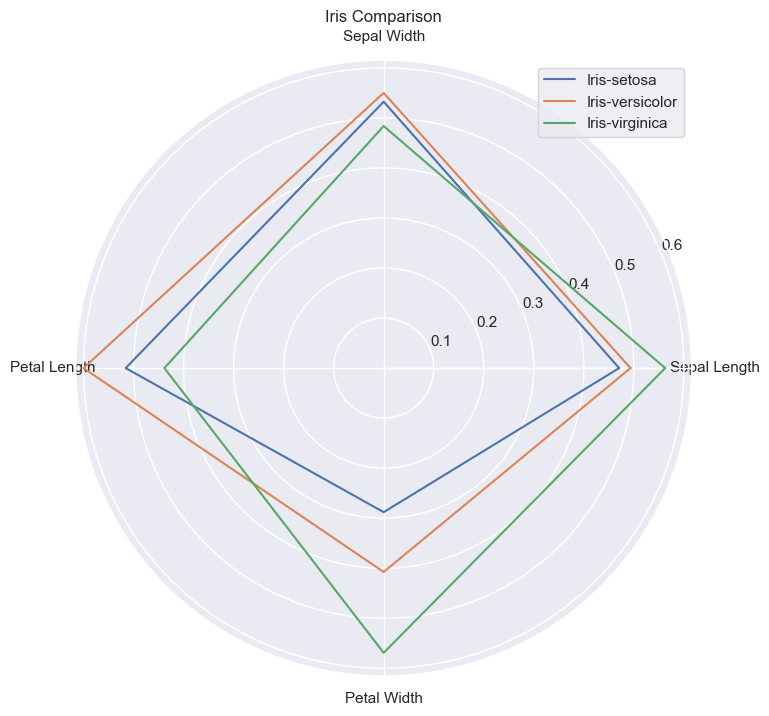

In [27]:
# Create a copy of the DataFrame
df_radar = df_iris_normalized.copy()

# Labels are configured
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len([*df_radar.iloc[[0]].values.tolist()[0], df_radar.iloc[[0]] .values.tolist()[0][0]]))
plt.figure(figsize=(8, 8))

# The subplot will be created
plt.subplot(polar=True)

# For each class of iris the plot is created
plt.plot(label_loc, [*df_radar.iloc[[0]].values.tolist()[0], df_radar.iloc[[0]].values.tolist()[0][0]], label= "Iris-setosa")
plt.plot(label_loc, [*df_radar.iloc[[1]].values.tolist()[0], df_radar.iloc[[1]].values.tolist()[0][0]], label= "Iris-versicolor")
plt.plot(label_loc, [*df_radar.iloc[[2]].values.tolist()[0], df_radar.iloc[[2]].values.tolist()[0][0]], label= "Iris-virginica")

# Arrange labels around the chart
plt.thetagrids(np.degrees(label_loc), labels=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', ''])

# The presentation is configured and the graph is displayed
plt.title('Iris Comparison')
plt.legend()
plt.show()

# Conclusion

In this notebook, we address basic examples to understand how different types of graphs are made with `MatPlotLib`, `Pandas` and `Seaborn`, with the aim that the user will become familiar with different ways of visualizing data. It is important to bear in mind that there are still many aspects to be addressed and others that will not be covered in depth. Continue with the practical section, where we will apply some of the graphs seen here to chemoinformatics.

# References
1.	UCI Machine Learning Repository. (s. f.). EEG Database. Retrieved from https://archive.ics.uci.edu/ml/datasets/eeg+database
2. Waskom, M. (n.d.). Seaborn: Statistical data visualization. Retrieved from https://seaborn.pydata.org/
3. Hunter, J. D. (n.d.). Matplotlib: A 2D graphics environment. Retrieved from https://matplotlib.org/
